<a href="https://www.pieriandata.com"><img src="../Pierian_Data_Logo.PNG"></a>
<strong><center>Copyright by Pierian Data Inc.</center></strong> 
<strong><center>Created by Jose Marcial Portilla.</center></strong>

# Keras Syntax Basics

With TensorFlow 2.0 , Keras is now the main API choice. Let's work through a simple regression project to understand the basics of the Keras syntax and adding layers.

## The Data

To learn the basic syntax of Keras, we will use a very simple fake data set, in the subsequent lectures we will focus on real datasets, along with feature engineering! For now, let's focus on the syntax of TensorFlow 2.0.

Let's pretend this data are measurements of some rare gem stones, with 2 measurement features and a sale price. Our final goal would be to try to predict the sale price of a new gem stone we just mined from the ground, in order to try to set a fair price in the market.

### Load the Data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../DATA/fake_reg.csv')

In [3]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


### Explore the data

Let's take a quick look, we should see strong correlation between the features and the "price" of this made up product.

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

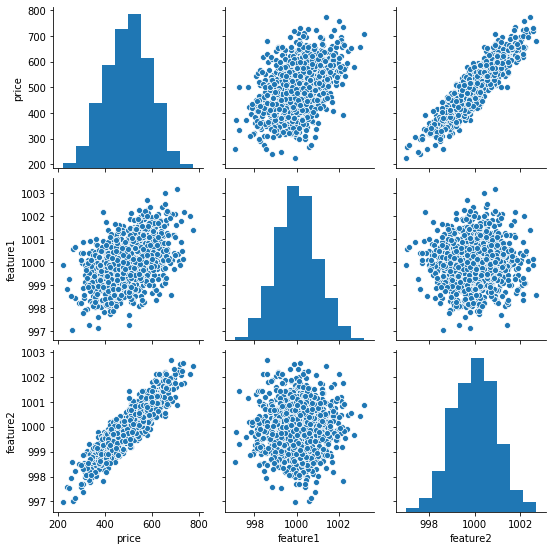

In [5]:
sns.pairplot(df)

Feel free to visualize more, but this data is fake, so we will focus on feature engineering and exploratory data analysis later on in the course in much more detail!

### Test/Train Split

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
# Convert Pandas to Numpy for Keras

# Features
X = df[['feature1','feature2']].values

# Label
y = df['price'].values

# Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [8]:
X_train.shape

(700, 2)

In [9]:
X_test.shape

(300, 2)

In [10]:
y_train.shape

(700,)

In [11]:
y_test.shape

(300,)

## Normalizing/Scaling the Data

We scale the feature data.

[Why we don't need to scale the label](https://stats.stackexchange.com/questions/111467/is-it-necessary-to-scale-the-target-value-in-addition-to-scaling-features-for-re)

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
help(MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing._data:

class MinMaxScaler(sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  MinMaxScaler(feature_range=(0, 1), copy=True)
 |  
 |  Transform features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  The transformation is calculated as::
 |  
 |      X_scaled = scale * X + min - X.min(axis=0) * scale
 |      where scale = (max - min) / (X.max(axis=0) - X.min(axis=0))
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_scaler>`.
 |  
 |  Parameters


In [14]:
scaler = MinMaxScaler()

In [15]:
# Notice to prevent data leakage from the test set, we only fit our scaler to the training set

In [16]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [17]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# TensorFlow 2.0 Syntax


## Import Options

There are several ways you can import Keras from Tensorflow (this is hugely a personal style choice, please use any import methods you prefer). We will use the method shown in the **official TF documentation**.

In [18]:
import tensorflow as tf

In [20]:
from tensorflow.keras.models import Sequential

In [21]:
help(Sequential)

Help on class Sequential in module tensorflow.python.keras.engine.sequential:

class Sequential(tensorflow.python.keras.engine.training.Model)
 |  Sequential(*args, **kwargs)
 |  
 |  `Sequential` groups a linear stack of layers into a `tf.keras.Model`.
 |  
 |  `Sequential` provides training and inference features on this model.
 |  
 |  Examples:
 |  
 |  >>> # Optionally, the first layer can receive an `input_shape` argument:
 |  >>> model = tf.keras.Sequential()
 |  >>> model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
 |  >>> # Afterwards, we do automatic shape inference:
 |  >>> model.add(tf.keras.layers.Dense(4))
 |  
 |  >>> # This is identical to the following:
 |  >>> model = tf.keras.Sequential()
 |  >>> model.add(tf.keras.layers.Dense(8, input_dim=16))
 |  
 |  >>> # And to the following:
 |  >>> model = tf.keras.Sequential()
 |  >>> model.add(tf.keras.layers.Dense(8, batch_input_shape=(None, 16)))
 |  
 |  >>> # Note that you can also omit the `input_shape` argument.


## Creating a Model

There are two ways to create models through the TF 2 Keras API, either pass in a list of layers all at once, or add them one by one.

Let's show both methods (its up to you to choose which method you prefer).

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

### Model - as a list of layers

In [23]:
model = Sequential([
    Dense(units=2),
    Dense(units=2),
    Dense(units=2)
])

### Model - adding in layers one by one

In [24]:
model = Sequential()

model.add(Dense(2))
model.add(Dense(2))
model.add(Dense(2))

Let's go ahead and build a simple model and then compile it by defining our solver

In [25]:
model = Sequential()

#Activation function: relu

#Nodes in hidden layer 1 = 4
model.add(Dense(4,activation='relu'))
#Nodes in hidden layer 2 = 4
model.add(Dense(4,activation='relu'))
#Nodes in hidden layer 3 = 4
model.add(Dense(4,activation='relu'))

# Final output node for prediction
model.add(Dense(1))

#optimizer='rmsprop' -> choosing the gradient descent. We can also choose adam here.
#loss='mse' -> mean square error.
model.compile(optimizer='rmsprop',loss='mse')

### Choosing an optimizer and loss

Keep in mind what kind of problem you are trying to solve:

    # For a multi-class classification problem
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # For a mean squared error regression problem
    model.compile(optimizer='rmsprop',
                  loss='mse')

# Training

Below are some common definitions that are necessary to know and understand to correctly utilize Keras:

* Sample: one element of a dataset.
    * Example: one image is a sample in a convolutional network
    * Example: one audio file is a sample for a speech recognition model
* Batch: a set of N samples. The samples in a batch are processed independently, in parallel. If training, a batch results in only one update to the model.A batch generally approximates the distribution of the input data better than a single input. The larger the batch, the better the approximation; however, it is also true that the batch will take longer to process and will still result in only one update. For inference (evaluate/predict), it is recommended to pick a batch size that is as large as you can afford without going out of memory (since larger batches will usually result in faster evaluation/prediction).
* Epoch: an arbitrary cutoff, generally defined as "one pass over the entire dataset", used to separate training into distinct phases, which is useful for logging and periodic evaluation.
* When using validation_data or validation_split with the fit method of Keras models, evaluation will be run at the end of every epoch.
* Within Keras, there is the ability to add callbacks specifically designed to be run at the end of an epoch. Examples of these are learning rate changes and model checkpointing (saving).

## Epoch
In terms of artificial neural networks, an epoch refers to one cycle through the full training dataset. Usually, training a neural network takes more than a few epochs. In other words, if we feed a neural network the training data for more than one epoch in different patterns, we hope for a better generalization when given a new "unseen" input (test data). An epoch is often mixed up with an iteration. Iterations is the number of batches or steps through partitioned packets of the training data, needed to complete one epoch.  Heuristically, one motivation is that (especially for large but finite training sets) it gives the network a chance to see the previous data to readjust the model parameters so that the model is not biased towards the last few data points during training.  

In [26]:
#Epoch -> generally
model.fit(X_train,y_train,epochs=250)

Epoch 1/250
22/22 [==============================] - 0s 2ms/step - loss: 256145.4219
Epoch 2/250
22/22 [==============================] - 0s 3ms/step - loss: 255759.6562
Epoch 3/250
22/22 [==============================] - 0s 2ms/step - loss: 255334.1562
Epoch 4/250
22/22 [==============================] - 0s 2ms/step - loss: 254837.7812
Epoch 5/250
22/22 [==============================] - 0s 2ms/step - loss: 254266.4844
Epoch 6/250
22/22 [==============================] - 0s 2ms/step - loss: 253607.7969
Epoch 7/250
22/22 [==============================] - 0s 2ms/step - loss: 252857.0000
Epoch 8/250
22/22 [==============================] - 0s 2ms/step - loss: 252005.1719
Epoch 9/250
22/22 [==============================] - 0s 2ms/step - loss: 251042.4688
Epoch 10/250
22/22 [==============================] - 0s 1ms/step - loss: 249958.0625
Epoch 11/250
22/22 [==============================] - 0s 1ms/step - loss: 248756.0000
Epoch 12/250
22/22 [==============================] - 0s 2ms/st

22/22 [==============================] - 0s 3ms/step - loss: 217.5725
Epoch 98/250
22/22 [==============================] - 0s 2ms/step - loss: 199.1525
Epoch 99/250
22/22 [==============================] - 0s 2ms/step - loss: 181.4709
Epoch 100/250
22/22 [==============================] - 0s 3ms/step - loss: 163.6187
Epoch 101/250
22/22 [==============================] - 0s 3ms/step - loss: 149.5641
Epoch 102/250
22/22 [==============================] - 0s 3ms/step - loss: 138.5237
Epoch 103/250
22/22 [==============================] - 0s 3ms/step - loss: 126.2113
Epoch 104/250
22/22 [==============================] - 0s 2ms/step - loss: 114.9750
Epoch 105/250
22/22 [==============================] - 0s 2ms/step - loss: 103.6800
Epoch 106/250
22/22 [==============================] - 0s 2ms/step - loss: 93.3166
Epoch 107/250
22/22 [==============================] - 0s 2ms/step - loss: 84.0312
Epoch 108/250
22/22 [==============================] - 0s 3ms/step - loss: 75.0559
Epoch 109/2

22/22 [==============================] - 0s 2ms/step - loss: 24.3731
Epoch 196/250
22/22 [==============================] - 0s 2ms/step - loss: 25.0122
Epoch 197/250
22/22 [==============================] - 0s 2ms/step - loss: 24.6397
Epoch 198/250
22/22 [==============================] - 0s 1ms/step - loss: 24.3973
Epoch 199/250
22/22 [==============================] - 0s 2ms/step - loss: 24.3817
Epoch 200/250
22/22 [==============================] - 0s 1ms/step - loss: 25.1182
Epoch 201/250
22/22 [==============================] - 0s 2ms/step - loss: 24.6943
Epoch 202/250
22/22 [==============================] - 0s 2ms/step - loss: 24.7523
Epoch 203/250
22/22 [==============================] - 0s 2ms/step - loss: 24.4596
Epoch 204/250
22/22 [==============================] - 0s 2ms/step - loss: 24.8623
Epoch 205/250
22/22 [==============================] - 0s 2ms/step - loss: 24.7288
Epoch 206/250
22/22 [==============================] - 0s 1ms/step - loss: 24.5008
Epoch 207/250
22/2

## Evaluation

Let's evaluate our performance on our training set and our test set. We can compare these two performances to check for overfitting.

In [27]:
model.history.history

{'loss': [256145.421875,
  255759.65625,
  255334.15625,
  254837.78125,
  254266.484375,
  253607.796875,
  252857.0,
  252005.171875,
  251042.46875,
  249958.0625,
  248756.0,
  247402.5625,
  245901.765625,
  244221.53125,
  242346.0625,
  240276.34375,
  237994.328125,
  235478.421875,
  232745.09375,
  229759.71875,
  226518.359375,
  222996.75,
  219222.625,
  215141.21875,
  210766.96875,
  206066.578125,
  201073.46875,
  195753.765625,
  190137.765625,
  184198.359375,
  177910.6875,
  171321.8125,
  164443.890625,
  157261.8125,
  149786.3125,
  142001.25,
  134037.34375,
  125805.328125,
  117434.5390625,
  108813.734375,
  100121.3828125,
  91311.203125,
  82518.4609375,
  73757.1875,
  65105.48046875,
  56573.34765625,
  48279.984375,
  40373.5390625,
  32938.86328125,
  26061.765625,
  19786.263671875,
  14240.1533203125,
  9654.6259765625,
  6055.83837890625,
  3502.8154296875,
  2039.436279296875,
  1518.220947265625,
  1438.6810302734375,
  1404.6177978515625,
  1360.

In [61]:
loss = model.history.history['loss']
#loss

[256145.421875,
 255759.65625,
 255334.15625,
 254837.78125,
 254266.484375,
 253607.796875,
 252857.0,
 252005.171875,
 251042.46875,
 249958.0625,
 248756.0,
 247402.5625,
 245901.765625,
 244221.53125,
 242346.0625,
 240276.34375,
 237994.328125,
 235478.421875,
 232745.09375,
 229759.71875,
 226518.359375,
 222996.75,
 219222.625,
 215141.21875,
 210766.96875,
 206066.578125,
 201073.46875,
 195753.765625,
 190137.765625,
 184198.359375,
 177910.6875,
 171321.8125,
 164443.890625,
 157261.8125,
 149786.3125,
 142001.25,
 134037.34375,
 125805.328125,
 117434.5390625,
 108813.734375,
 100121.3828125,
 91311.203125,
 82518.4609375,
 73757.1875,
 65105.48046875,
 56573.34765625,
 48279.984375,
 40373.5390625,
 32938.86328125,
 26061.765625,
 19786.263671875,
 14240.1533203125,
 9654.6259765625,
 6055.83837890625,
 3502.8154296875,
 2039.436279296875,
 1518.220947265625,
 1438.6810302734375,
 1404.6177978515625,
 1360.62548828125,
 1318.6129150390625,
 1265.85205078125,
 1235.703613281

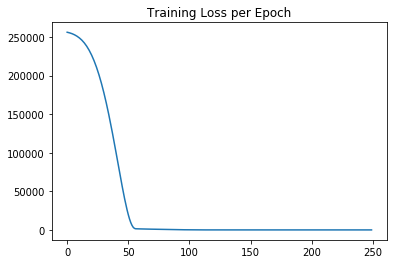

In [69]:
#Plotting loss over time
sns.lineplot(x=range(len(loss)),y=loss)
plt.title("Training Loss per Epoch");

### Compare final evaluation (MSE) on training set and test set.

These should hopefully be fairly close to each other.

In [70]:
model.metrics_names

['loss']

In [71]:
training_score = model.evaluate(X_train,y_train,verbose=0)
test_score = model.evaluate(X_test,y_test,verbose=0)

In [72]:
training_score

23.75834846496582

In [73]:
test_score

25.34552001953125

### Further Evaluations

In [74]:
test_predictions = model.predict(X_test)

In [75]:
test_predictions

array([[405.63785],
       [624.20917],
       [592.75116],
       [572.829  ],
       [366.92465],
       [579.7861 ],
       [515.5789 ],
       [459.5285 ],
       [549.81384],
       [447.92233],
       [612.4377 ],
       [549.4888 ],
       [419.46976],
       [409.2272 ],
       [651.9348 ],
       [437.6899 ],
       [508.93857],
       [660.66943],
       [663.31696],
       [566.1151 ],
       [334.47986],
       [445.24142],
       [382.84756],
       [379.06345],
       [567.18225],
       [611.2518 ],
       [532.92883],
       [428.24023],
       [656.17114],
       [414.4362 ],
       [443.03308],
       [485.59384],
       [438.81027],
       [682.61176],
       [425.12387],
       [418.05997],
       [502.40018],
       [551.0363 ],
       [510.2488 ],
       [395.70694],
       [619.2502 ],
       [416.9886 ],
       [605.0881 ],
       [446.3564 ],
       [502.48038],
       [582.3059 ],
       [669.7245 ],
       [490.8702 ],
       [318.79205],
       [485.89545],


In [76]:
#Column name 'Test Y' and actual label values y_test
pred_df = pd.DataFrame(y_test,columns=['Test Y'])

In [77]:
pred_df

,Test Y
0,402.296319
1,624.156198
2,582.455066
3,578.588606
4,371.224104
5,584.381108
6,514.405641
7,464.115870
8,551.650100
9,451.804172


In [78]:
#Converting test_predictions by ANN model to series
test_predictions = pd.Series(test_predictions.reshape(300,))

In [79]:
test_predictions

0      405.637848
1      624.209167
2      592.751160
3      572.828979
4      366.924652
          ...    
295    529.582886
296    515.869202
297    610.298828
298    417.312408
299    411.238647
Length: 300, dtype: float32

In [80]:
# Concat the series to dataframe pred_df
pred_df = pd.concat([pred_df,test_predictions],axis=1)

In [81]:
pred_df.columns = ['Test Y','Model Predictions']

In [82]:
pred_df

,Test Y,Model Predictions
0,402.296319,405.637848
1,624.156198,624.209167
2,582.455066,592.751160
3,578.588606,572.828979
4,371.224104,366.924652
5,584.381108,579.786072
6,514.405641,515.578918
7,464.115870,459.528503
8,551.650100,549.813843
9,451.804172,447.922333


Let's compare to the real test labels!

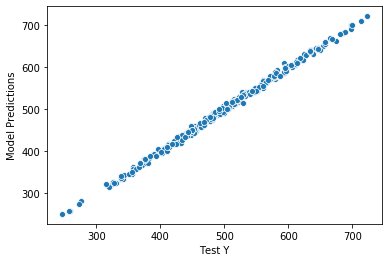

In [83]:
#Plot the two columns of actual labels and predicted values
sns.scatterplot(x='Test Y',y='Model Predictions',data=pred_df)

In [84]:
#Calculate residue
pred_df['Error'] = pred_df['Test Y'] - pred_df['Model Predictions']

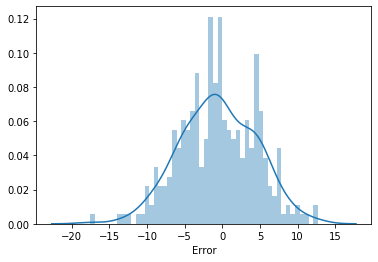

In [85]:
#Plot residue and check if normal distribution
sns.distplot(pred_df['Error'],bins=50)

In [86]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

### Mean Absolute Error 

In [88]:
mean_absolute_error(pred_df['Test Y'],pred_df['Model Predictions'])

4.047982455270861

In [89]:
df.describe()
# mean price 498.67
# mean absolute error is 4.04 which is nearly 1% of the mean value of target label. Thus the prediction model is good
# If mean absolute error is the large percentage of mean value of target label, then the prediction model is bad

,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,1000.014171,999.979847
std,93.785431,0.974018,0.948330
min,223.346793,997.058347,996.995651
25%,433.025732,999.332068,999.316106
50%,502.382117,1000.009915,1000.002243
75%,564.921588,1000.637580,1000.645380
max,774.407854,1003.207934,1002.666308


### Mean Squared Error 

In [48]:
mean_squared_error(pred_df['Test Y'],pred_df['Model Predictions'])

25.345525383371175

In [49]:
# Essentially the same thing, difference just due to precision
test_score

25.34552001953125

### Root Mean Squared Error 

In [50]:
#RMSE
test_score**0.5

5.034433435803005

# Predicting on brand new data

What if we just saw a brand new gemstone from the ground? What should we price it at? This is the **exact** same procedure as predicting on a new test data!

In [51]:
# [[Feature1, Feature2]]
new_gem = [[998,1000]]

In [52]:
# Don't forget to scale!
scaler.transform(new_gem)

array([[0.14117652, 0.53968792]])

In [53]:
new_gem = scaler.transform(new_gem)

In [54]:
model.predict(new_gem)

array([[420.0717]], dtype=float32)

## Saving and Loading a Model

In [55]:
from tensorflow.keras.models import load_model

In [56]:
model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'

In [57]:
#You can later load the model from any jupyter notebook
later_model = load_model('my_model.h5')

In [58]:
later_model.predict(new_gem)

array([[420.0717]], dtype=float32)